Parte I  **navengando el proyecto de DS-I**

Buen día profesora **Leticia** y **Silvia**.
Iniciare con la carga del data set el cual se encuentra en un repositorio en GitHub

El dataset trata sobre los **factores determinantes** que influyen en la **elegibilidad** de un individuo para una tarjeta de crédito.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# URL del dataset
url = "https://raw.githubusercontent.com/Jartorias/DS_61110_Coderhouse/main/credit_card_eligibility.csv"

# Cargar el dataset usando pandas
df = pd.read_csv(url, delimiter=",", encoding="ISO-8859-1")

# Mostrar las primeras filas del dataset
df.head()


,ID,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Target
0,5008804,1,1,1,1,0,0,0,0,2,15,427500.0,32.868574,12.435574,Working,Higher education,Civil marriage,Rented apartment,Other,1
1,5008806,1,1,1,0,0,0,0,0,2,29,112500.0,58.793815,3.104787,Working,Secondary / secondary special,Married,House / apartment,Security staff,0
2,5008808,0,0,1,0,1,1,0,0,1,4,270000.0,52.321403,8.353354,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,0
3,5008812,0,0,1,0,0,0,1,0,1,20,283500.0,61.504343,0.000000,Pensioner,Higher education,Separated,House / apartment,Other,0
4,5008815,1,1,1,1,1,1,0,0,2,5,270000.0,46.193967,2.105450,Working,Higher education,Married,House / apartment,Accountants,0


Antes de crear los gráficos, voy a realizar un análisis exploratorio de los datos **(EDA).** Empezaremos mostrando las primeras filas del dataset para tener una idea de su estructura, distribución de variables y posteriormente determinar que factores tiene el mayor impacto en la elegibilidad de las personas para la obtencion de una tarjeta de credito, al final esta exploración busca obtener información general sobre el dataset, incluyendo el tipo de datos y la cantidad de valores no nulos. **(Vale aclarar que no se tiene valores nulos dentro del dataset por lo que no se iniciara con ninguna transformación)*

In [2]:
# Mostrar las primeras filas del dataset
df.head()

# Información general del dataset
df.info()

# Descripción estadística de las variables numéricas
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9709 entries, 0 to 9708
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               9709 non-null   int64  
 1   Gender           9709 non-null   int64  
 2   Own_car          9709 non-null   int64  
 3   Own_property     9709 non-null   int64  
 4   Work_phone       9709 non-null   int64  
 5   Phone            9709 non-null   int64  
 6   Email            9709 non-null   int64  
 7   Unemployed       9709 non-null   int64  
 8   Num_children     9709 non-null   int64  
 9   Num_family       9709 non-null   int64  
 10  Account_length   9709 non-null   int64  
 11  Total_income     9709 non-null   float64
 12  Age              9709 non-null   float64
 13  Years_employed   9709 non-null   float64
 14  Income_type      9709 non-null   object 
 15  Education_type   9709 non-null   object 
 16  Family_status    9709 non-null   object 
 17  Housing_type  

,ID,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Target
count,9.709000e+03,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9.709000e+03,9709.000000,9709.000000,9709.000000
mean,5.076105e+06,0.348749,0.367700,0.671542,0.217427,0.287671,0.087548,0.174683,0.422804,2.182614,27.270059,1.812282e+05,43.784093,5.664730,0.132145
std,4.080270e+04,0.476599,0.482204,0.469677,0.412517,0.452700,0.282650,0.379716,0.767019,0.932918,16.648057,9.927731e+04,11.625768,6.342241,0.338666
min,5.008804e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.700000e+04,20.504186,0.000000,0.000000
25%,5.036955e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,13.000000,1.125000e+05,34.059563,0.928150,0.000000
50%,5.069449e+06,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,26.000000,1.575000e+05,42.741466,3.761884,0.000000
75%,5.112986e+06,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,3.000000,41.000000,2.250000e+05,53.567151,8.200031,0.000000
max,5.150479e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.000000,20.000000,60.000000,1.575000e+06,68.863837,43.020733,1.000000


Se realiza la descripción de las columnas contenidas dentro del dataset:

**ID:**	Un identificador para cada individuo (cliente).

**Gender:**	El género del individuo. (0 Hombre 1 Mujer)

**Own_car:**	Una característica binaria que indica si el individuo posee un automóvil. (0 No 1 Si)

**Own_property:**	Una característica binaria que indica si el individuo posee una propiedad. (0 No 1 Si)

**Work_phone:**	Una función binaria que indica si la persona tiene un teléfono del trabajo. (0 No 1 Si)

**Phone:**	Una característica binaria que indica si el individuo tiene un teléfono. (0 No 1 Si)

**Email:**	Una característica binaria que indica si el individuo ha proporcionado una dirección de correo electrónico. (0 No 1 Si)

**Unemployed:**	Característica binaria que indica si el individuo está desempleado. (0 No 1 Si)

**Num_children:**	El número de hijos que tiene el individuo.

**Num_family:**	El número total de miembros de la familia.

**Account_length:**	La duración de la cuenta del individuo en un banco o institución financiera.

**Total_income:**	El ingreso total del individuo.

**Age:**	La edad del individuo.

**Years_employed:**	El número de años que el individuo ha estado empleado.

**Income_type:**	El tipo de ingreso (por ejemplo, empleado, autónomo, etc.).

**Education_type:**	El nivel educativo del individuo.

**Family_status:**	El estado familiar del individuo.

**Housing_type:**	El tipo de vivienda en la que vive el individuo.

**Occupation_type:**	El tipo de ocupación que realiza el individuo.

**Target:**	La variable objetivo para la tarea de clasificación, que indica si el individuo es elegible para una tarjeta de crédito o no. (0 No 1 Si)

Para fianlizar nuestro analisis explorare mediante una descripción estadística las variables numéricas, de la distribución de las variables categóricas. mediante la frecuencia de los datos.

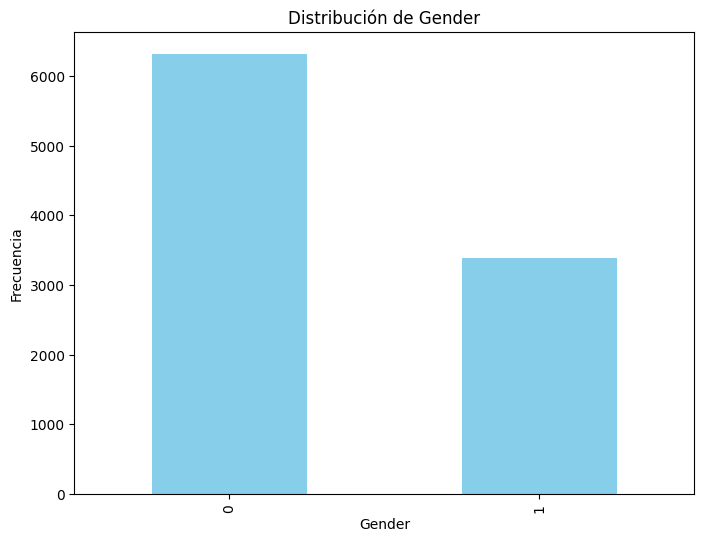

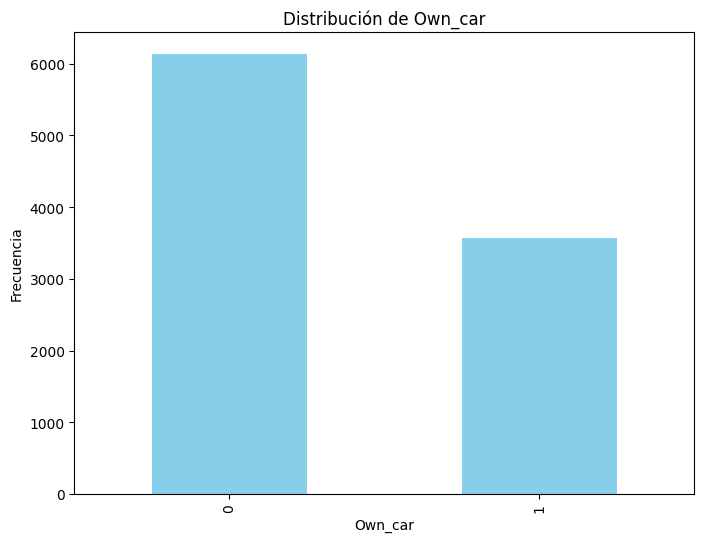

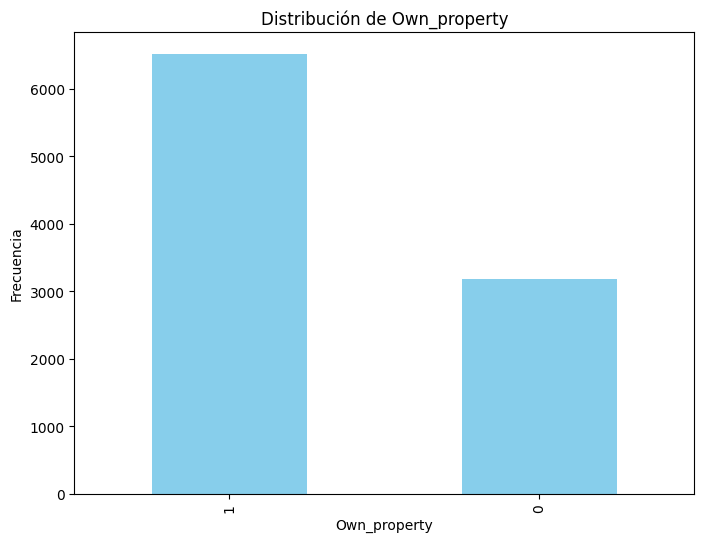

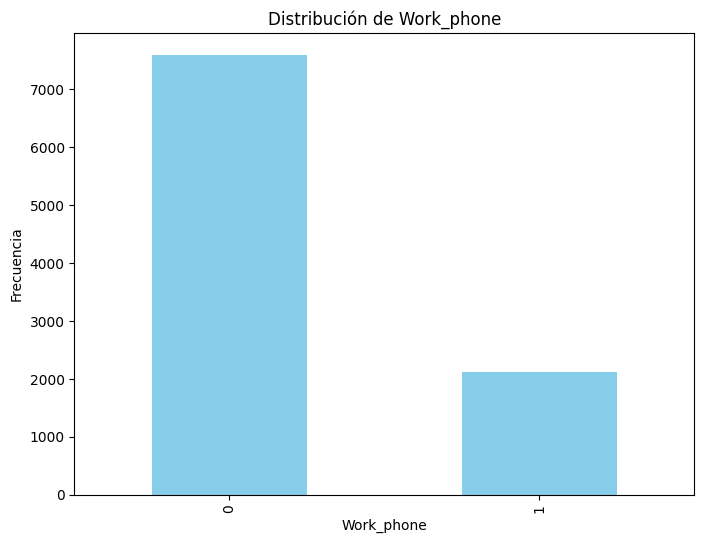

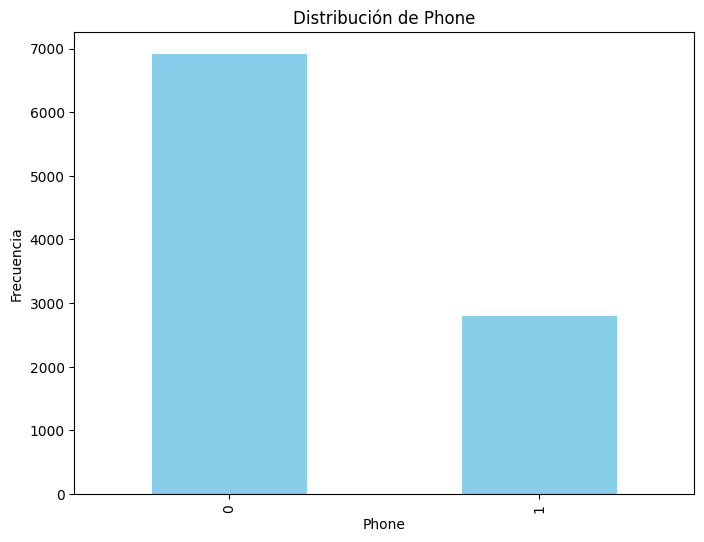

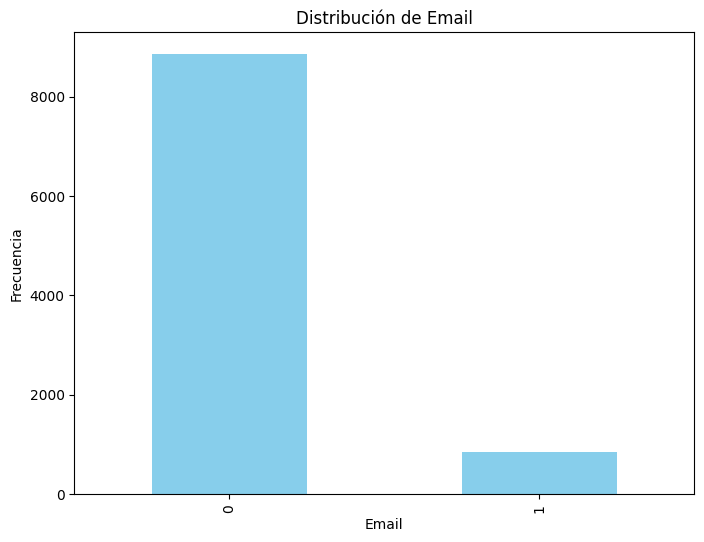

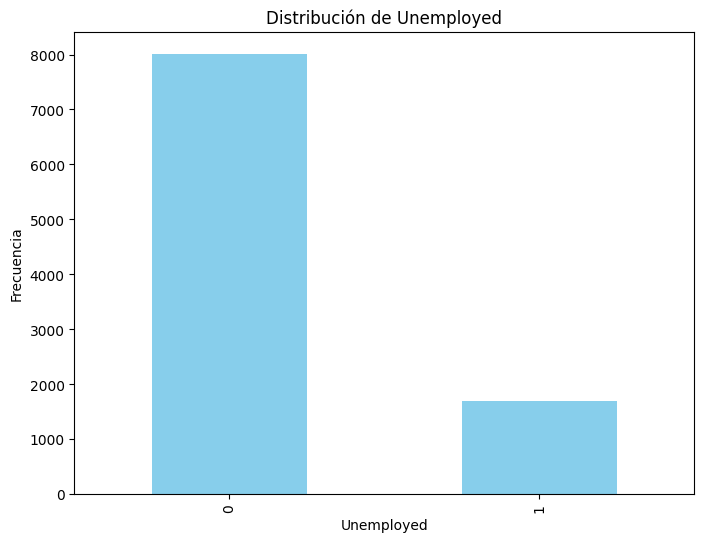

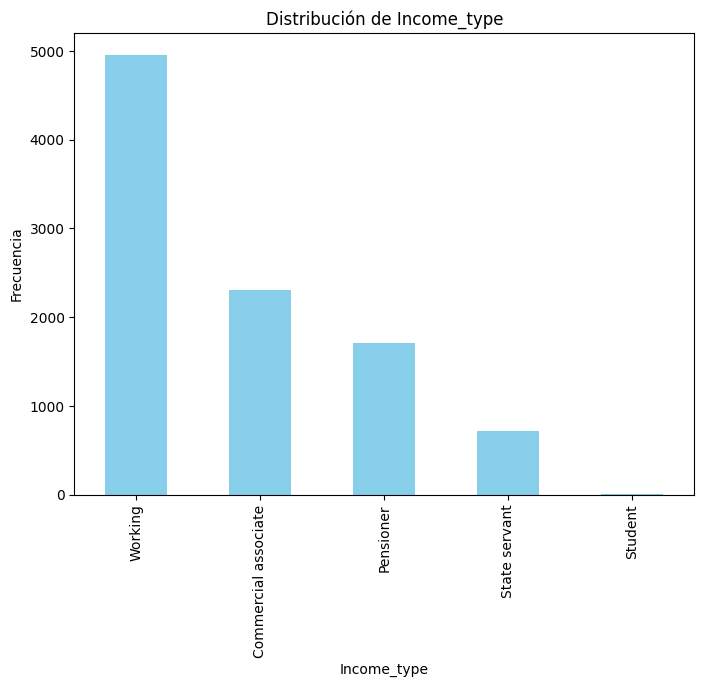

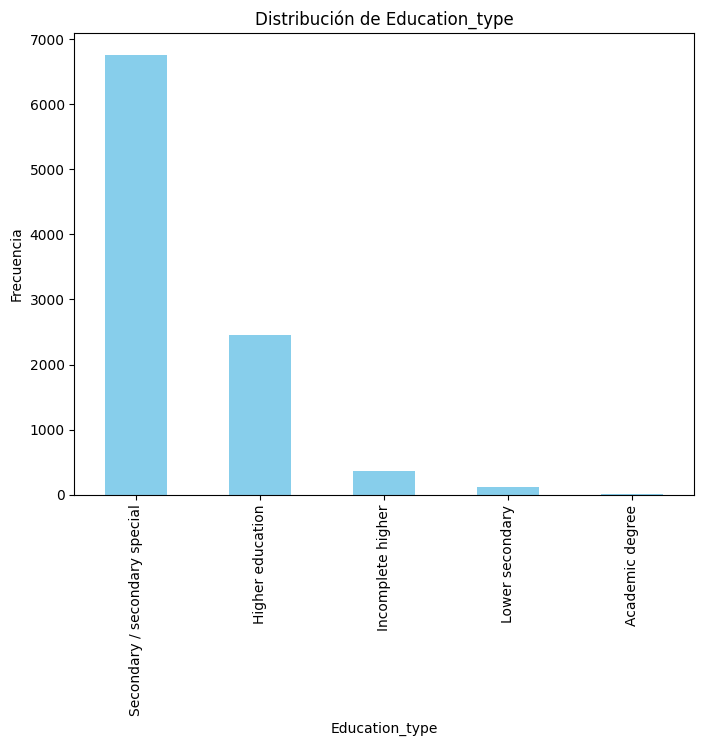

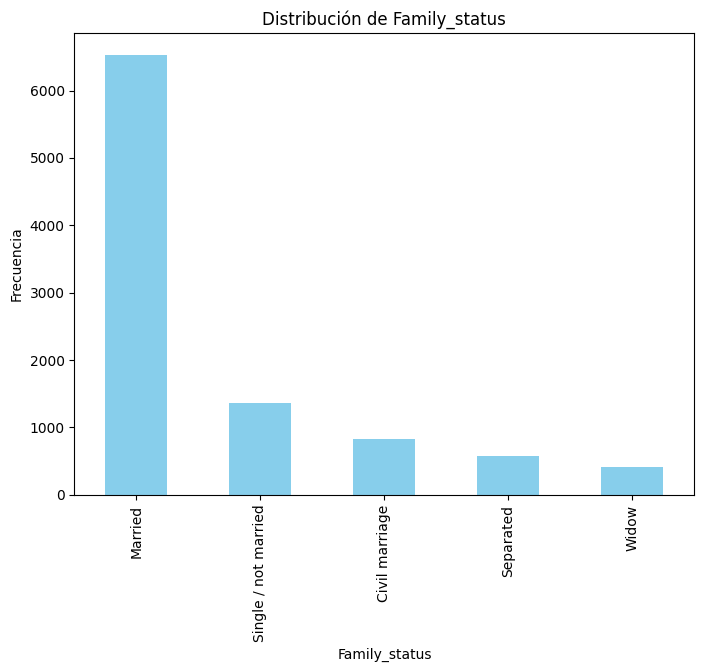

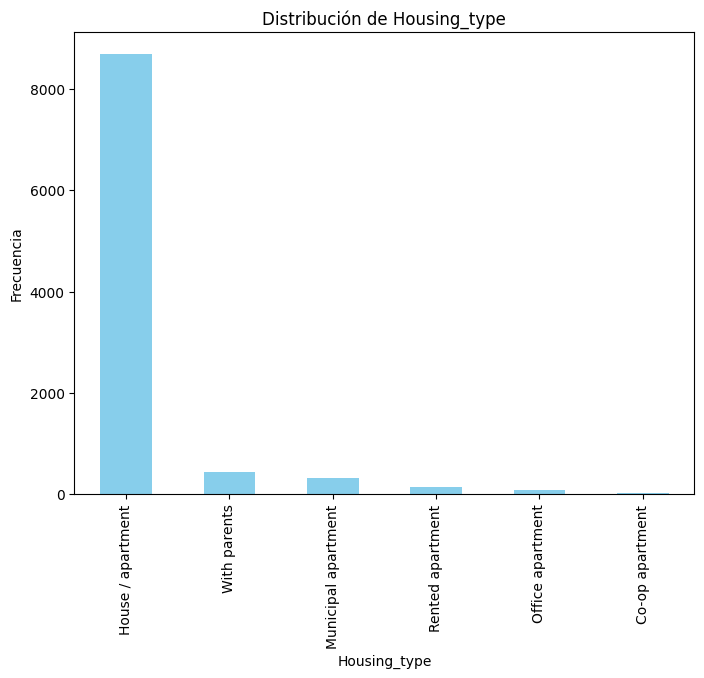

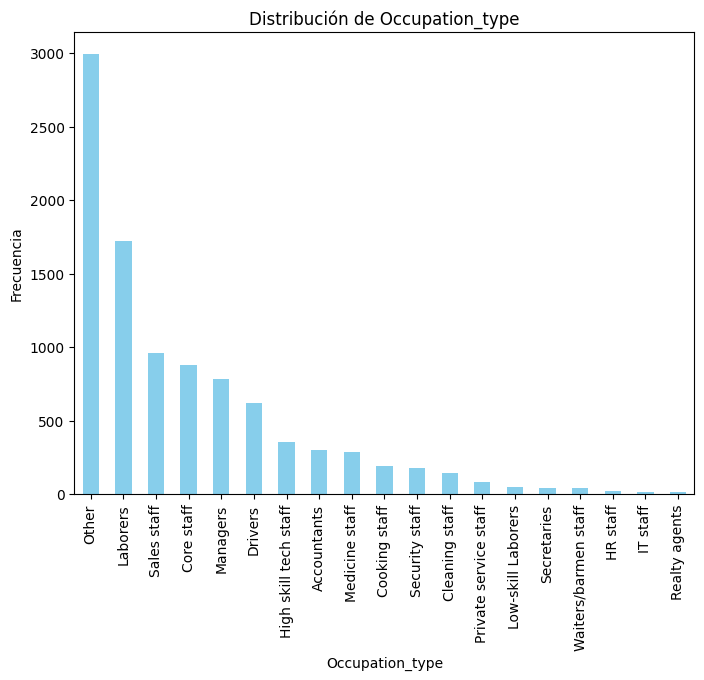

In [3]:
# Distribución de variables categóricas
categorical_variables = ['Gender', 'Own_car', 'Own_property', 'Work_phone', 'Phone', 'Email', 'Unemployed',
                         'Income_type', 'Education_type', 'Family_status', 'Housing_type', 'Occupation_type']

for column in categorical_variables:
    plt.figure(figsize=(8, 6))
    df[column].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f'Distribución de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.show()


La **frecuencia** nos da una muestra el contenido del dataset, columna a columna validando el contenido de la distintas variables dentro del dataset, al validar estas como factores se tendrá un mejor conocimiento de lo que es relevante dentro del sector bancario en los EEUU al momento de evaluar un posible asignación de tarjetas de crédito, como son el hecho de tener buenos ingresos, tener cuentas con varios meses de apertura (debería estar asociado con los ingresos y movimientos) el estar o no casado, el nivel educativo y el tipo de empleo en que la persona se desempeña, entre otros.

Por lo tanto, iniciemos con la hipótesis.

Los ingresos de las personas varían según su edad, género y estado civil, enlazando con lo anterior debería haber diferencias en el ingreso total según el tipo de ingreso y el nivel educativo, por otro lado, debe existir una relación entre los años de empleo, ingresos totales y tipo de vivienda y a partir de esta última variable más la edad y el target debería haber evaluado todos los aspectos generales para el otorgamiento de una tarjeta de crédito.


Empecemos a validar nuestra hipótesis:

Iniciemos con la exploración grafica mediante la librería con gráficos hechos con Matplotlib....


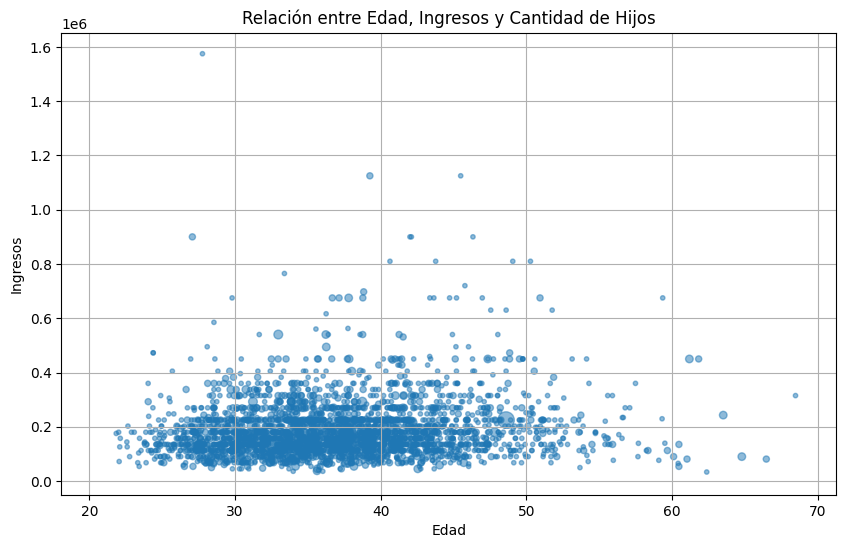

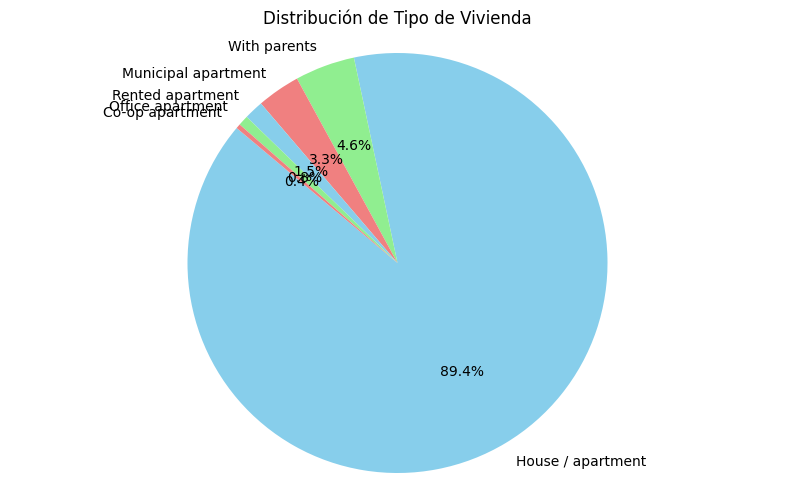

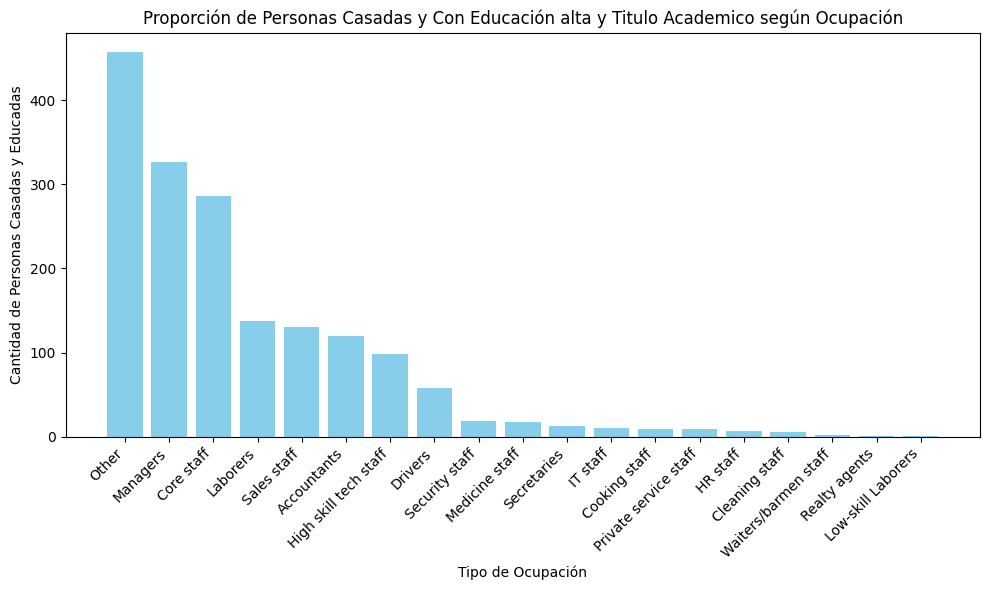

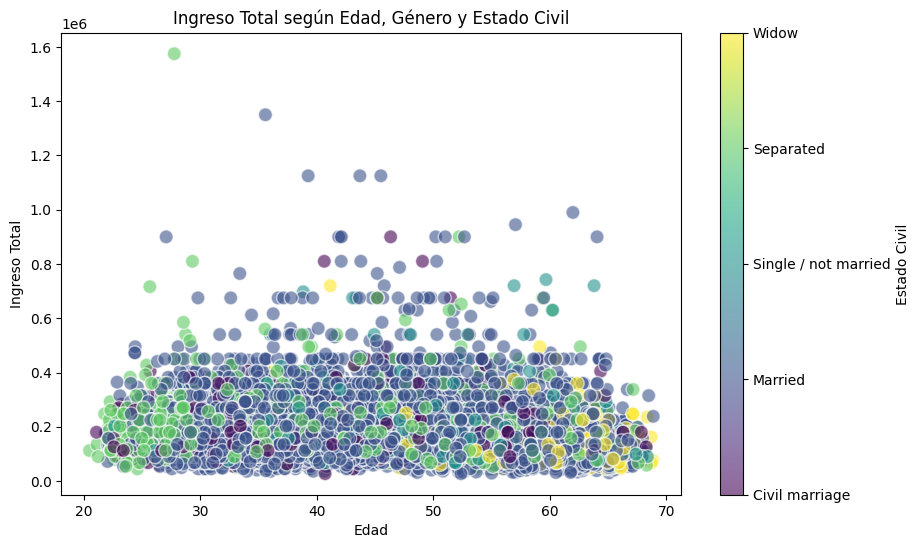

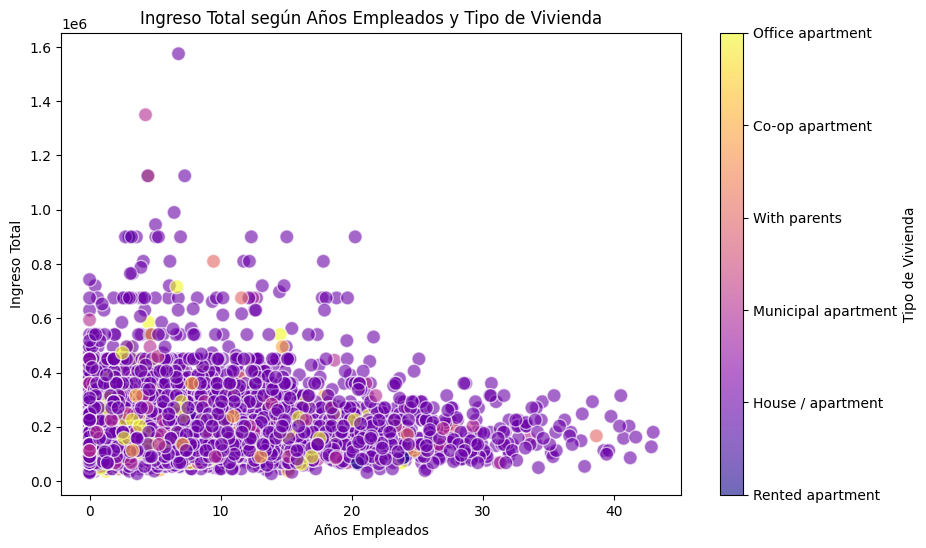

In [6]:
# Gráfico 1: Relación entre edad, ingresos y cantidad de hijos (Grafico de disperción)
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['Total_income'], s=df['Num_children']*10, alpha=0.5)
plt.title('Relación entre Edad, Ingresos y Cantidad de Hijos')
plt.xlabel('Edad')
plt.ylabel('Ingresos')
plt.grid(True)
plt.show()

# Gráfico 2: Distribución de género, tipo de vivienda y educación (Gráfico de torta)
plt.figure(figsize=(10, 6))
housing_counts = df['Housing_type'].value_counts()
plt.pie(housing_counts, labels=housing_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Distribución de Tipo de Vivienda')
plt.axis('equal')
plt.show()

# Gráfico 3: Proporción de personas casadas según ocupación y nivel educativo (Histograma)


# Contar la cantidad de personas casadas y con nivel educativo distinto a "lower secondary" "Incomplete higher" y "Secondary / secondary special" por cada ocupación
df_married_educated = df[(df['Family_status'] == 'Married') &
                         (df['Education_type'].isin(['Academic degree', 'Higher education']))]

married_educated_by_occupation = df_married_educated['Occupation_type'].value_counts()

# Crear un histograma para visualizar la distribución de ocupaciones para personas casadas y con nivel educativo distinto a "lower secondary" "Secondary / secondary special" "Incomplete higher"
plt.figure(figsize=(10, 6))
plt.bar(married_educated_by_occupation.index, married_educated_by_occupation.values, color='skyblue')

plt.title('Proporción de Personas Casadas y Con Educación alta y Titulo Academico según Ocupación')
plt.xlabel('Tipo de Ocupación')
plt.ylabel('Cantidad de Personas Casadas y Educadas')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

# Gráfico 4: Ingreso total de las personas según su edad, género y estado civil (Grafico de disperción)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['Age'], df['Total_income'], c=df['Family_status'].astype('category').cat.codes, cmap='viridis', alpha=0.6, edgecolors='w', s=100)
plt.xlabel('Edad')
plt.ylabel('Ingreso Total')
plt.title('Ingreso Total según Edad, Género y Estado Civil')
plt.colorbar(scatter, ticks=range(len(df['Family_status'].unique())), label='Estado Civil', format=plt.FuncFormatter(lambda val, loc: df['Family_status'].unique()[val]))
plt.show()


# Grafico 5: Relación entre los años de empleo, ingreso total y el tipo de vivienda (Grafico de disperción)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['Years_employed'], df['Total_income'], c=df['Housing_type'].astype('category').cat.codes, cmap='plasma', alpha=0.6, edgecolors='w', s=100)
plt.xlabel('Años Empleados')
plt.ylabel('Ingreso Total')
plt.title('Ingreso Total según Años Empleados y Tipo de Vivienda')
plt.colorbar(scatter, ticks=range(len(df['Housing_type'].unique())), label='Tipo de Vivienda', format=plt.FuncFormatter(lambda val, loc: df['Housing_type'].unique()[val]))
plt.show()


**Grafico 1 (Matplotlib)** Nos muestra que las personas que tienen entre 25 y 42 años tienen hijos tienen una media de 15 mil a 20 mil como ingresos. *Una variable a resaltar*

**Grafico 2 (Marplotlib)** Nos muestra que casi el 90% de las personas viven en un casa o apartamento, lo que nos indican costumbres a múltiples obligaciones, otros ... *Una variable a resaltar*

**Grafico 3 (Matplotlib)** Nos muestra que la mayoría de las personas casadas son nivel de educación alta se tienen cargos como Gerentes, y personal central, aparte de otras labores que no son especificadas dentro del dataset... **Una variable a Descartar**

**Grafico 4 (Matplotlib)** Nos indica que en el rango de edad de 30 a 50 años se concentre el mayor potencial de ingresos, si se está casada se tiene mayores ingresos a las solteras al igual tenemos personas que se salen de la norma outlier dentro de los 30 años con un ingreso muy superior al resto... *Una variable a resaltar*

**Grafico 5 (Matplotlib)** No muestra una relación entre los años trabajados y el tipo de hogar que se habita (Casa y Apartamento) también en donde se reúne a partir de 10 años de antigüedad una media de ingresos de 25 mil USD... *Una variable a resaltar*

A continuación, usaremos la librería **Seaborn** para seguir con el análisis grafico de nuestra **hipótesis**


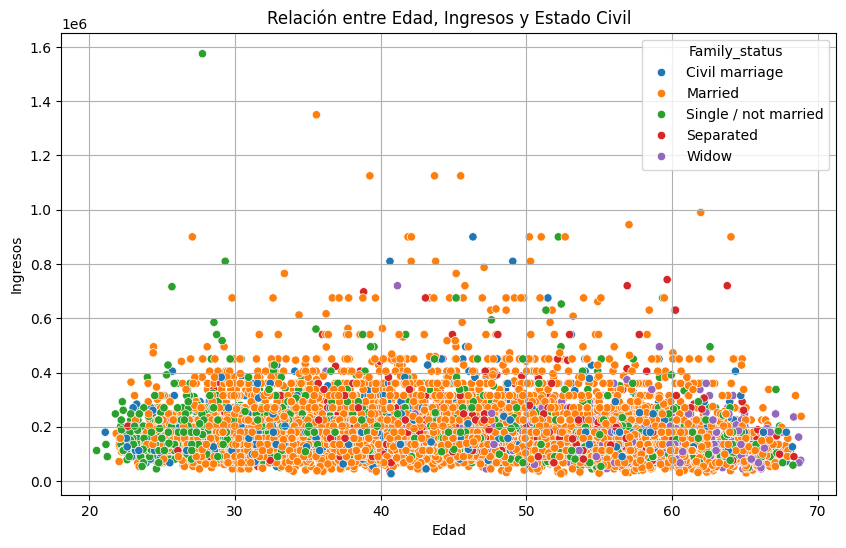

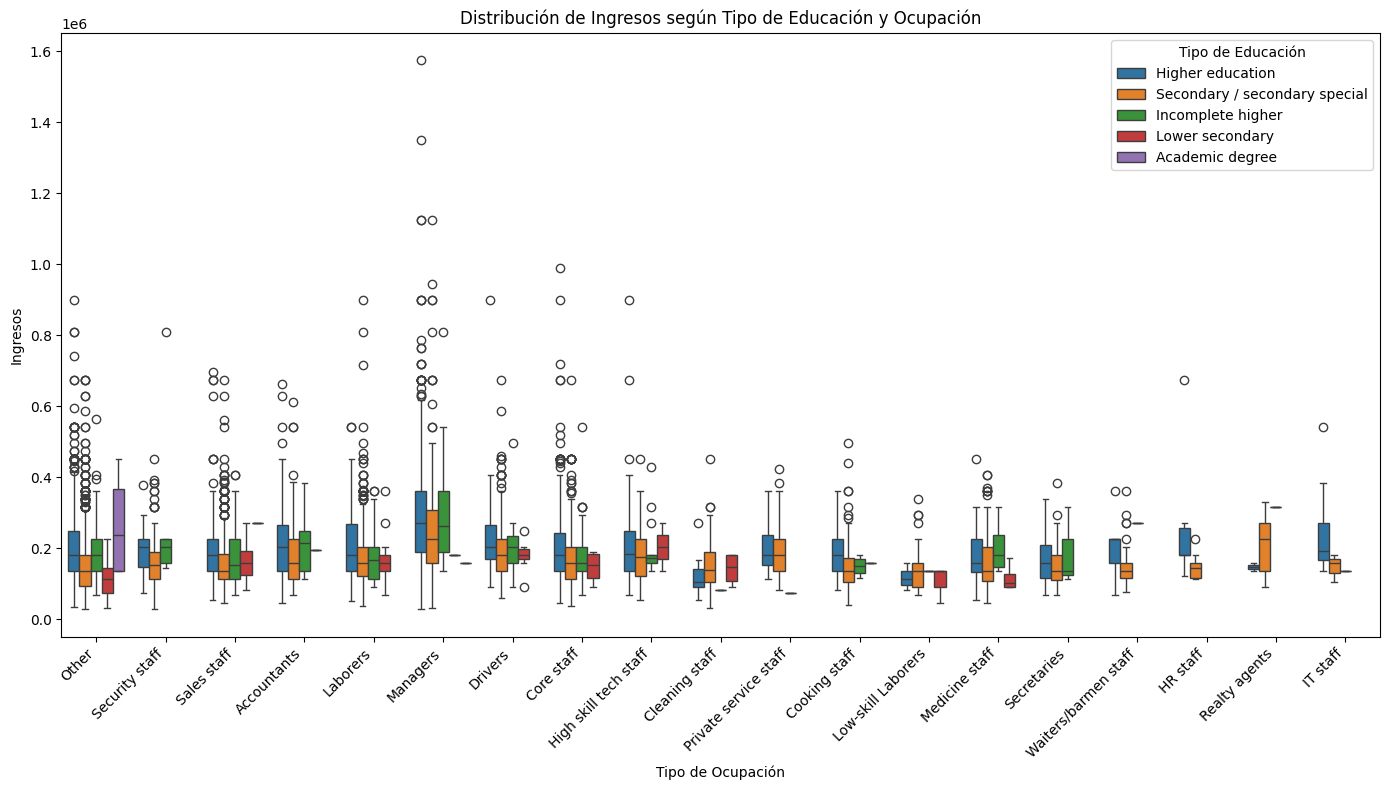

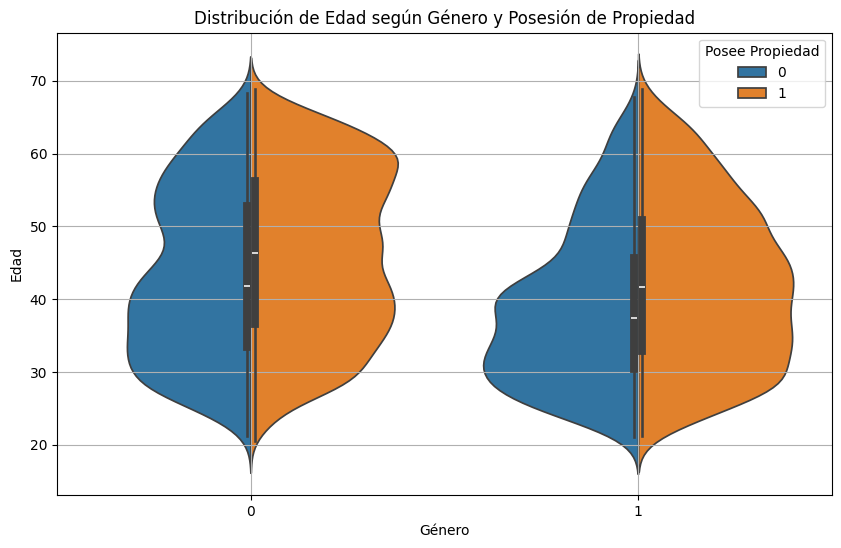

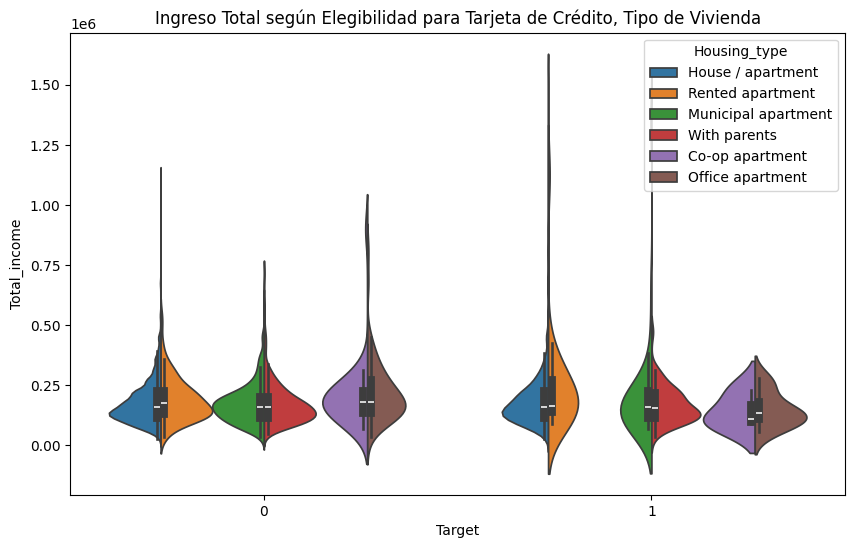

In [8]:
# Gráfico 1: Relación entre Edad, Ingresos y Estado Civil (Gráfico de dispersión)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Total_income', hue='Family_status', data=df)
plt.title('Relación entre Edad, Ingresos y Estado Civil')
plt.xlabel('Edad')
plt.ylabel('Ingresos')
plt.grid(True)
plt.show()

# Grafico 2: Distribución de Ingresos según Tipo de Educación y Ocupación (Box Plot)
plt.figure(figsize=(14, 8))
sns.boxplot(x='Occupation_type', y='Total_income', hue='Education_type', data=df)
plt.title('Distribución de Ingresos según Tipo de Educación y Ocupación')
plt.xlabel('Tipo de Ocupación')
plt.ylabel('Ingresos')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Tipo de Educación')
plt.tight_layout()
plt.show()

# Gráfico 3: Distribución de Edad según Género y Posesión de Propiedad (Violin Plot)
plt.figure(figsize=(10, 6))
sns.violinplot(x='Gender', y='Age', hue='Own_property', data=df, split=True)
plt.title('Distribución de Edad según Género y Posesión de Propiedad')
plt.xlabel('Género')
plt.ylabel('Edad')
plt.grid(True)
plt.legend(title='Posee Propiedad')
plt.show()


# Gráfico 4: Ingreso total de las personas elegibles para una tarjeta de crédito frente a las que no lo son y según su tipo de vivienda (Violin Plot)
plt.figure(figsize=(10, 6))
sns.violinplot(x='Target', y='Total_income', hue='Housing_type', data=df, split=True)
plt.title('Ingreso Total según Elegibilidad para Tarjeta de Crédito, Tipo de Vivienda')
plt.show()


**Grafico 1 (Seaborn)** Nos muestra que las personas casadas tienden a tener mayores ingresos que las personas solteras, especialmente a partir de los 30 años, una característica resaltada en el grafico 1 de matplotlib... *Una variable a resaltar*

**Grafico 2 (Seaborn)**  Nos muestra que en general, las personas con mayor nivel educativo tienen ingresos más altos... *Una variable a resaltar*

**Grafico 3 (Seaborn)** Nos muestra que las personas que no poseen una propiedad tienden a ser más jóvenes especialmente se ven más mujeres entre los 30 y 40 años que tienen propiedad por encima de su con genero a partir de los 50 años en los hombres se revierte esta situación siendo más estable el tema de las propiedades en los hombres... **Variable a descartar**

**Grafico 4 (Seaborn)** Nos muestra que las personas que viven en casa tienen una media de ingresos más alta independiente de que sea objetivos para una posible entrega de tarjeta de crédito... **Variable a Descartar**

Conclusión a partir de la **hipótesis inicial**, después del análisis grafico se ha evidencia variables que si se suman con otros factores nos pueden llegar a determinar si efectivamente se tiene en cuenta un set de cualidades que debe cumplir el candidato para la entrega de la tarjeta de crédito, como son la edad, ingresos, estado civil, nivel educativo y el tipo de vivienda que habita...

"Gracias Silvia" espero haber mejorado la primera entrega

In [ ]:
# Empecemos a segmentar y a aprender con los datos

Parte 2  **Estructurando el proyecto de DS-I**

Se segmentarán los datos en grupos a partir de las variables a resaltar encontradas después del análisis grafico realizado con las librerías Matplotlib y Seaborn, las características que tomaremos para el ejercicio son:


Age

Total_income

Education_type

Housing_type

Num_children

Iniciaremos con técnica no supervisada ... "Thanks Leti"

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

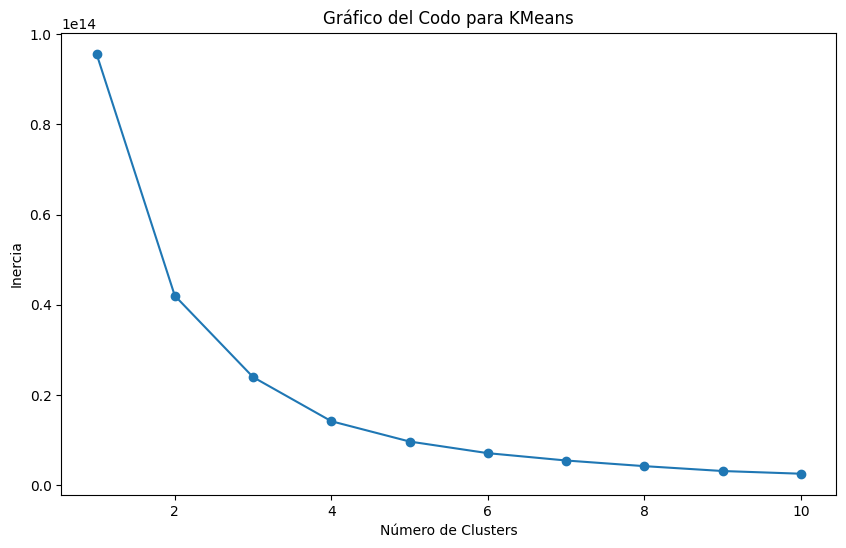

In [14]:
# Iniciaremos determinado el numero de clusters para Kmeans 'Segmentando"

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


# Seleccionamos las columnas relevantes
df_selected = df[['Age', 'Total_income', 'Education_type', 'Housing_type', 'Num_children']]

# Convertimos las columnas categóricas a numéricas
df_dummies = pd.get_dummies(df_selected, columns=['Education_type', 'Housing_type'])

# Eliminamos filas con datos faltantes
df_dummies = df_dummies.dropna()

# Lista para guardar la inercia de cada KMeans
inertia = []

# Probar diferentes números de clusters (1 a 10, por ejemplo)
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(df_dummies)
    inertia.append(kmeans.inertia_)

# Dibujar el gráfico del codo
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Gráfico del Codo para KMeans')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.show()


El resultado que nos muestra el grafico de codo es de **3 cluster** vamos a aplicarlo...

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


        ID  Gender  Own_car  Own_property  Work_phone  Phone  Email  \
0  5008804       1        1             1           1      0      0   
1  5008806       1        1             1           0      0      0   
2  5008808       0        0             1           0      1      1   
3  5008812       0        0             1           0      0      0   
4  5008815       1        1             1           1      1      1   

   Unemployed  Num_children  Num_family  ...  Total_income        Age  \
0           0             0           2  ...      427500.0  32.868574   
1           0             0           2  ...      112500.0  58.793815   
2           0             0           1  ...      270000.0  52.321403   
3           1             0           1  ...      283500.0  61.504343   
4           0             0           2  ...      270000.0  46.193967   

   Years_employed           Income_type                 Education_type  \
0       12.435574               Working               Higher

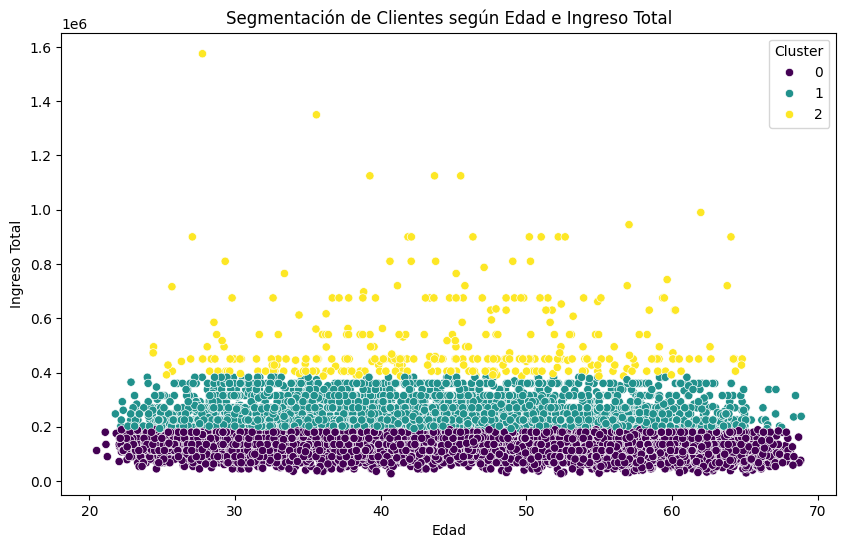

In [17]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns


# Aplicamos KMeans con 3 clusters (Tecnica del codo)
kmeans = KMeans(n_clusters=3, random_state=42)
df_dummies['Cluster'] = kmeans.fit_predict(df_dummies)

# Agregamos la columna 'Cluster' al DataFrame original
df['Cluster'] = df_dummies['Cluster']

# Mostrar las primeras filas con los clusters asignados
print(df.head())

# Visualizar los clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Total_income', hue='Cluster', data=df, palette='viridis')
plt.title('Segmentación de Clientes según Edad e Ingreso Total')
plt.xlabel('Edad')
plt.ylabel('Ingreso Total')
plt.show()


Hemos dividido los datos en tres grupos diferentes según su edad, ingresos, nivel educativo, tipo de vivienda y número de hijos. (El grupo 1 se ve muy interesante para nuestro modelo predicitvo ML)

Cada color en el gráfico representa un grupo.

Podemos ver que algunos grupos tienen ingresos más altos que otros.

In [18]:
# Descripción de los clústeres
for i in range(3):
    print(f"Clúster {i}")
    print(df[df['Cluster'] == i].describe())
    print("\n")

Clúster 0
                 ID       Gender      Own_car  Own_property   Work_phone  \
count  6.314000e+03  6314.000000  6314.000000   6314.000000  6314.000000   
mean   5.076322e+06     0.282705     0.298543      0.665980     0.226956   
std    4.081799e+04     0.450350     0.457655      0.471684     0.418897   
min    5.008806e+06     0.000000     0.000000      0.000000     0.000000   
25%    5.037016e+06     0.000000     0.000000      0.000000     0.000000   
50%    5.069459e+06     0.000000     0.000000      1.000000     0.000000   
75%    5.113001e+06     1.000000     1.000000      1.000000     0.000000   
max    5.150479e+06     1.000000     1.000000      1.000000     1.000000   

             Phone        Email   Unemployed  Num_children   Num_family  \
count  6314.000000  6314.000000  6314.000000   6314.000000  6314.000000   
mean      0.282072     0.070478     0.213811      0.416218     2.177542   
std       0.450044     0.255972     0.410027      0.767239     0.932540   
min  

En esta parte intentremos ver como estan compuestos mas especificamente nuestros 3 grupos (clusters)

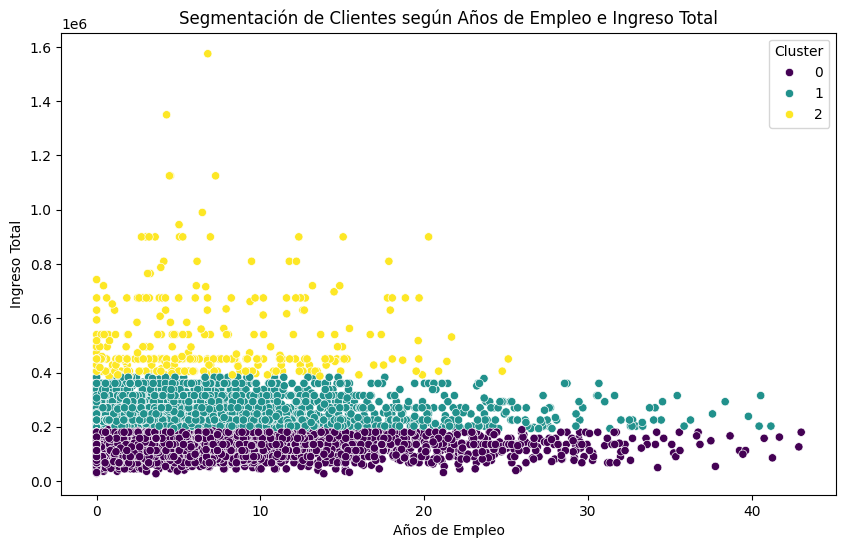

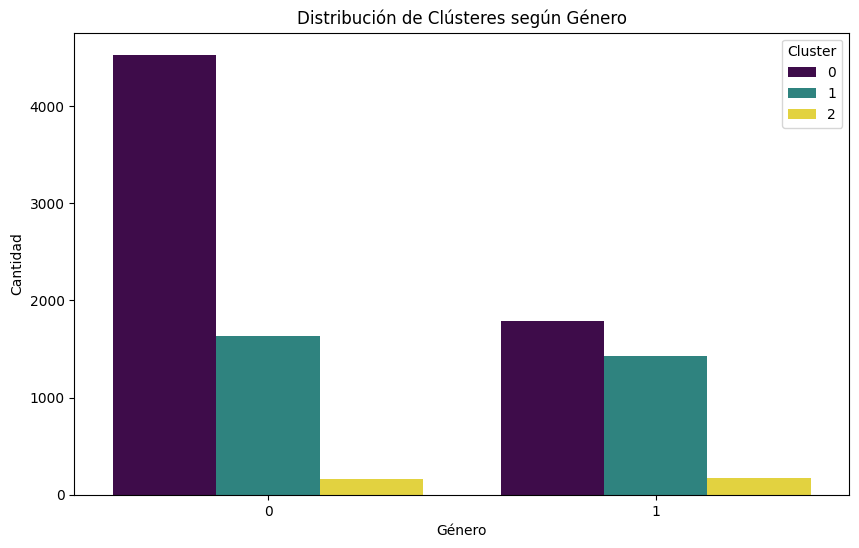

In [19]:
# Gráfico de dispersión con más características
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Years_employed', y='Total_income', hue='Cluster', data=df, palette='viridis')
plt.title('Segmentación de candidatos a tarjeta de credito según Años de Empleo e Ingreso Total')
plt.xlabel('Años de Empleo')
plt.ylabel('Ingreso Total')
plt.show()

# Gráfico de barras para ver la distribución de clústeres según el género
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', hue='Cluster', data=df, palette='viridis')
plt.title('Distribución de Clústeres según Género')
plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.show()


A partir de los gráficos de **ML no supervisado**, hemos identificado patrones interesantes en los datos relacionados con la edad, el total de ingresos y los años laborando. Estos hallazgos nos motivan a explorar más a fondo estos clusters, incorporando otras variables relevantes como el género y los años de empleo.


El análisis de ML no supervisado nos ha proporcionado una valiosa comprensión de la estructura subyacente en los datos. Para validar estas observaciones y obtener información más precisa, utilizaremos técnicas de ML supervisado. Este enfoque nos permitirá construir modelos predictivos que relacionen las variables de interés (edad, ingresos, años laborando, género y experiencia laboral) para él objetivo específico de la hipótesis, elegibilidad para una tarjeta de crédito



[[2326  173]
 [ 381   33]]
              precision    recall  f1-score   support

           0       0.86      0.93      0.89      2499
           1       0.16      0.08      0.11       414

    accuracy                           0.81      2913
   macro avg       0.51      0.51      0.50      2913
weighted avg       0.76      0.81      0.78      2913



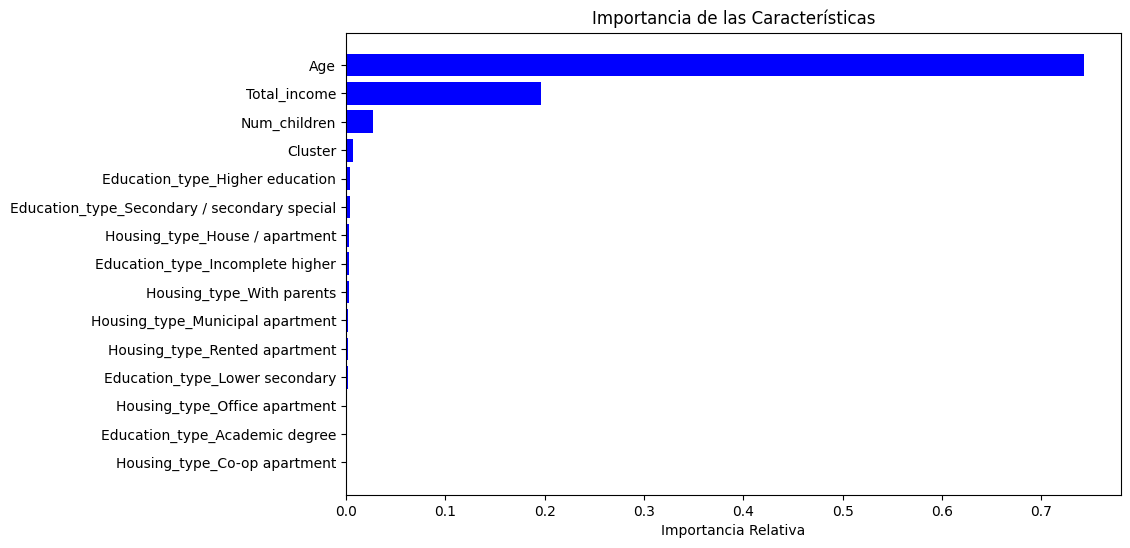

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt


#Con las columnas relevantes ya seleccionadas -Age - Total_income - Education_type - Housinng_Type - Num_children, convertidas en categoricas Education_type y Housing_Type y habiendo eliminado las filas faltantes procedemos a alimentar nuestro modelo

# Seleccionamos las características y la variable target
features = df_dummies
target = df['Target']

# Dividimos los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Construimos el modelo
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Realizamos predicciones
y_pred = model.predict(X_test)

# Evaluamos el modelo
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Visualizar la importancia de las características
importances = model.feature_importances_
features_names = X_train.columns
indices = np.argsort(importances)

plt.figure(figsize=(10, 6))
plt.title('Importancia de las Características')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features_names[i] for i in indices])
plt.xlabel('Importancia Relativa')
plt.show()




En este análisis, se implementó el modelo **RandomForestClassifier** para clasificar la elegibilidad de tarjetas de crédito a partir de datos segmentados con K-means. Se interpretaron los resultados del modelo para comprender su capacidad para identificar candidatos elegibles y no elegibles.

*Resultados Clave:*

Alta precisión para la **"NO" elegibilidad**: El modelo presenta una precisión del 86% al identificar correctamente a los clientes que no son elegibles para una tarjeta de crédito. Esto indica una fortaleza en la detección de aquellos que no cumplen con los criterios establecidos.
Dificultades para identificar la "SÍ" elegibilidad: La precisión del modelo para clasificar la elegibilidad positiva (16%) es significativamente menor, lo que sugiere que el modelo tiene dificultades para identificar a los clientes que sí son aptos para una tarjeta de crédito.
Posibles sesgos en el conjunto de datos: El bajo rendimiento en la clasificación de elegibilidad positiva podría deberse a sesgos presentes en los datos de entrenamiento. Es importante realizar un análisis más profundo para identificar y abordar estos sesgos.
Utilidad de las variables seleccionadas: Las variables utilizadas parecen ser más efectivas para identificar a los clientes no elegibles, lo que indica que son relevantes para evaluar el riesgo crediticio.

Conclusiones:

El modelo RandomForestClassifier presenta una alta precisión para identificar a los clientes no elegibles para una tarjeta de crédito. Sin embargo, su capacidad para clasificar la elegibilidad positiva es limitada, lo que sugiere la necesidad de un análisis más profundo de los datos y el modelo para mejorar su rendimiento general. Las variables seleccionadas parecen ser adecuadas para evaluar el riesgo crediticio, pero se requiere una mayor investigación para comprender mejor su impacto en la clasificación de la elegibilidad.

<ipython-input-25-78ecd070aa58>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected[feature] = le.fit_transform(df_selected[feature])
<ipython-input-25-78ecd070aa58>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected[feature] = le.fit_transform(df_selected[feature])


         Age  Total_income  Education_type  Housing_type  Num_children  Target
0  32.868574      427500.0               1             4             0       1
1  58.793815      112500.0               4             1             0       0
2  52.321403      270000.0               4             1             0       0
3  61.504343      283500.0               1             1             0       0
4  46.193967      270000.0               1             1             0       0
[[2162  337]
 [ 362   52]]
              precision    recall  f1-score   support

           0       0.86      0.87      0.86      2499
           1       0.13      0.13      0.13       414

    accuracy                           0.76      2913
   macro avg       0.50      0.50      0.50      2913
weighted avg       0.75      0.76      0.76      2913



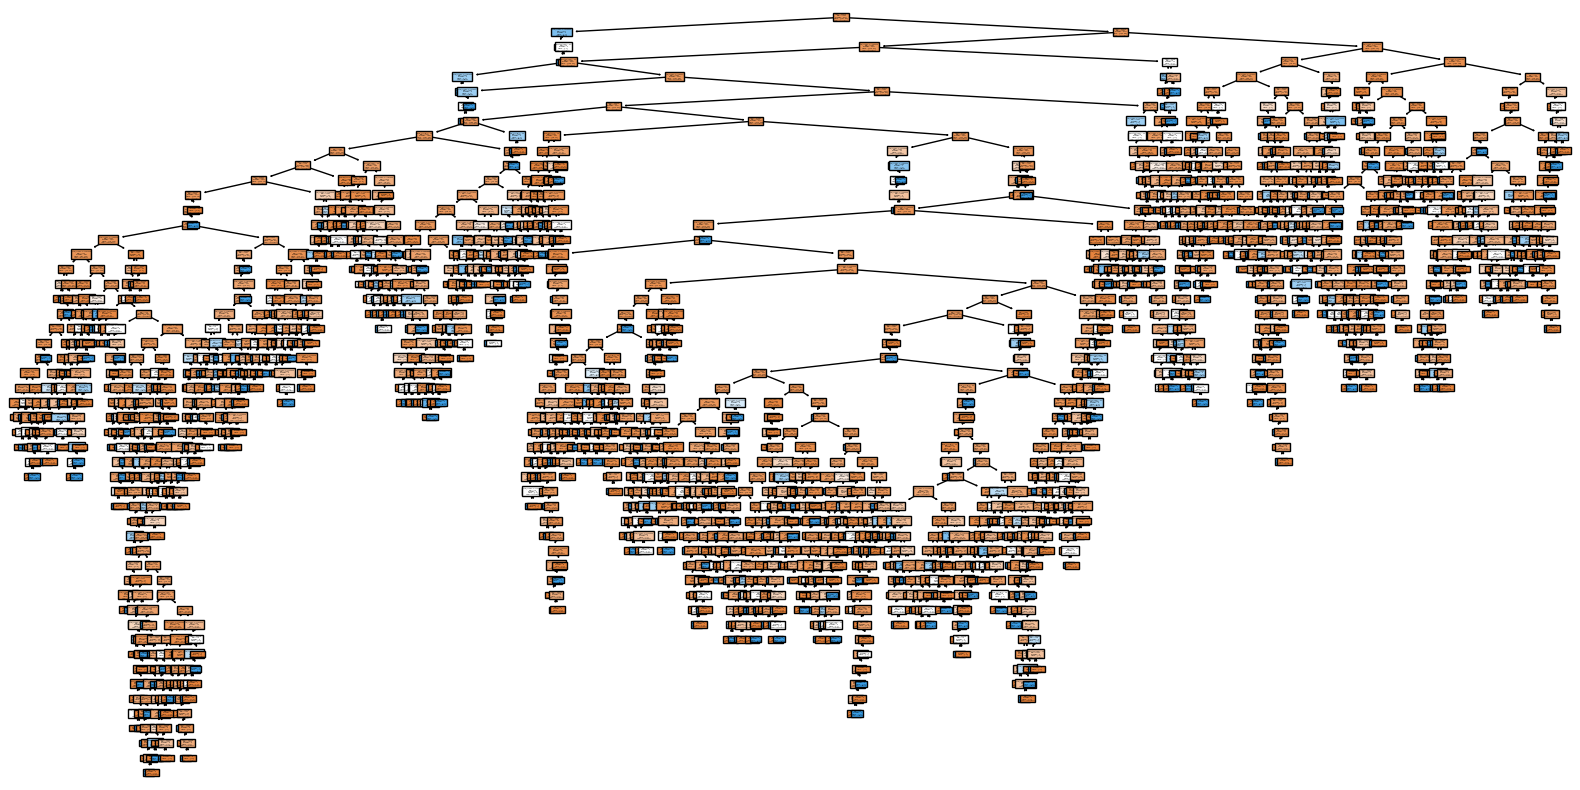

In [25]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn import tree

# Seleccionar las columnas necesarias
df_selected = df[['Age', 'Total_income', 'Education_type', 'Housing_type', 'Num_children', 'Target']]

# Codificar las características categóricas
label_encoders = {}
categorical_features = ['Education_type', 'Housing_type']

for feature in categorical_features:
    le = LabelEncoder()
    df_selected[feature] = le.fit_transform(df_selected[feature])
    label_encoders[feature] = le

# Mostrar las primeras filas del DataFrame seleccionado y codificado
print(df_selected.head())

# Definir las características (X) y la variable objetivo (y)
X = df_selected.drop('Target', axis=1)
y = df_selected['Target']

# División de los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenar el modelo de árbol de decisión
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Hacer predicciones y evaluar el modelo
y_pred_dt = dt_model.predict(X_test)

print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

# Visualizar el árbol de decisión
plt.figure(figsize=(20,10))
tree.plot_tree(dt_model, feature_names=X.columns, class_names=['Not Eligible', 'Eligible'], filled=True)
plt.show()


Siguiendo las recomendaciones de Leti, he implementado un modelo de árbol de decisión para analizar la elegibilidad de tarjetas de crédito. Si bien la cantidad de datos no permite la visualización del árbol en sí, los resultados obtenidos son relevantes para comprender el comportamiento del modelo.


Resultados Clave:
Alta precisión para la identificación de clientes no elegibles: El modelo presenta una precisión del 87% al clasificar correctamente a los clientes que no son aptos para una tarjeta de crédito. Esto indica una fortaleza en la detección de aquellos que no cumplen con los criterios establecidos.
Dificultad para identificar clientes elegibles: La precisión del modelo para clasificar la elegibilidad positiva (13%) es significativamente menor, lo que sugiere que el modelo tiene dificultades para identificar a los clientes que sí son aptos para una tarjeta de crédito.

Conclusiones:
Los resultados obtenidos a través del modelo de árbol de decisión son consistentes con los hallazgos previos. Se confirma que el modelo tiene una alta capacidad para identificar a los clientes no elegibles, mientras que presenta dificultades para clasificar a los clientes elegibles.

A continuación
Análisis de sesgos en los datos: Es importante investigar si existen sesgos en los datos de entrenamiento que puedan estar afectando el desempeño del modelo.
Incorporación de variables adicionales: Se podrían considerar variables adicionales que no se han incluido en el modelo actual y que podrían ser relevantes para la elegibilidad de las tarjetas de crédito.
Exploración de otros algoritmos: Se podrían probar diferentes algoritmos de aprendizaje automático que podrían ser más adecuados para este tipo de problema de clasificación.

Agradezco a Leticia  por su valiosa recomendación de utilizar un árbol de decisión para este análisis. Su sugerencia ha sido fundamental para avanzar en la comprensión de la elegibilidad de las tarjetas de crédito y a Silvia por ayudarme a darle un mejor contexto al trabajo juntando objetivos e hipótesis...